# Using numpy to look for a correlation between time data and sea level rise
---

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

### To Do
---
1.  Calculate some statistics on the level array

2.  Display:

*  the year with the biggest rise in level
*  the year with the lowest rise in level

3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.  (*Expected output:  0.98 when rounded to 2 decimal places*)



In [ ]:
# Read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)
# Use df.head() and df.info() to inspect the data and the column data types
import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv"
df_seaLevel=pd.read_csv(url)
print(df_seaLevel.head())
print(df_seaLevel.info())

   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    floa

Max 9.326771644 
Min -0.440944881 
Mean 3.650340811880598 
Standard Deviation 2.476399631426498 
Total 489.1456687920001
The year with the biggest rise in sea level is  [2012]
The year with the lowest rise in sea level is  [1882]
The value of the Pearson correlation is 0.98


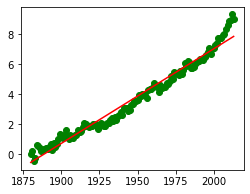

In [ ]:
#FUNCTION 1
#This function calculates some statistics on a column of a given dataset
def calculate_stat(df,column):
  df_new=df.dropna(subset=[column])  
  column=np.array(df_new[column])

  try:
    max=column.max()
    min=column.min()
    mean=column.mean()
    std=column.std()
    total=column.sum()
    return max,min,mean,std,total
  except:
    msg="This column is not numeric"
    return msg

max_col,min_col,mean_col,std_col,total_col=calculate_stat(df_seaLevel,"CSIRO Adjusted Sea Level")
print("Max",max_col,"\n""Min",min_col,"\n""Mean",mean_col,"\n""Standard Deviation",std_col,"\n""Total",total_col)

#FUNCTION 2
#This function calculates the year corresponding to the max or the minimum sea level in the dataset
def calculate_yr(df,column,func):
#Using Numpy
  year=np.array(df["Year"])
  index_func=np.where(df[column]==func)
  year_func=year[index_func]
  return year_func

#We could do the same by using Pandas
#year_max=df.loc[df[column]==func] 
#return year_max["Year"]

year_Max_level=calculate_yr(df_seaLevel,"CSIRO Adjusted Sea Level",max_col)
year_Min_level=calculate_yr(df_seaLevel,"CSIRO Adjusted Sea Level",min_col)
print("The year with the biggest rise in sea level is ",year_Max_level)
print("The year with the lowest rise in sea level is ",year_Min_level)

#FUNCTION 3
#This function calculates the Pearson product-moment correlation coefficient between year and the rise in sea level.

import matplotlib.pyplot as plt
def calculate_Pearson_coeff(df,col1,col2):
  x = np.array((df[col1]))
  y = np.array((df[col2]))
  my_rho = np.corrcoef(x, y)

#Plot the dots and the linear regression
  plt.figure(figsize=(4, 3)) 
  plt.plot(x, y, 'o', color='green')  
  m, b = np.polyfit(x, y, 1)
  plt.plot(x, m*x+b, color='red')   
  return round(my_rho[0,1],2)

rho=calculate_Pearson_coeff(df_seaLevel,"Year","CSIRO Adjusted Sea Level")
print("The value of the Pearson correlation is", rho)

#Comment
# The Pearson correlation coefficient measures the linear association between variables. It shows a very positive correlation between the two variables
# which means that the Sea level is rising over time


# Reflection
----

## What skills have you demonstrated in completing this notebook?

In this project I learnt how to:

• Access data from a csv datasource.

• Work with different data structures.

• Investigating and cleaning a dataset.

• Calculate some statistics on the level array, eg:
*  mean
*  standard deviation
*  total

• Use of statistical techniques like regression, visualization and summary statistics. 

• use data visualization tools to create very effective charts and pull out information

